### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike=pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike1=bike.drop(['instant','dteday','casual','registered'],axis=1)

In [8]:
bike1['season']=bike1['season'].astype('object')
bike1['yr']=bike1['yr'].astype('object')
bike1['mnth']=bike1['mnth'].astype('object')
bike1['holiday']=bike1['holiday'].astype('object')
bike1['weekday']=bike1['weekday'].astype('object')
bike1['weathersit']=bike1['weathersit'].astype('object')
bike1['workingday']=bike1['workingday'].astype('object')

In [9]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


# Bi variate analysis

<AxesSubplot:xlabel='season', ylabel='cnt'>

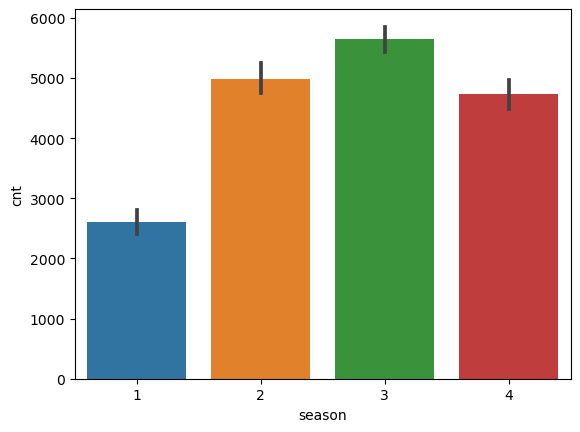

In [10]:
sns.barplot(x='season',y='cnt',data=bike1)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

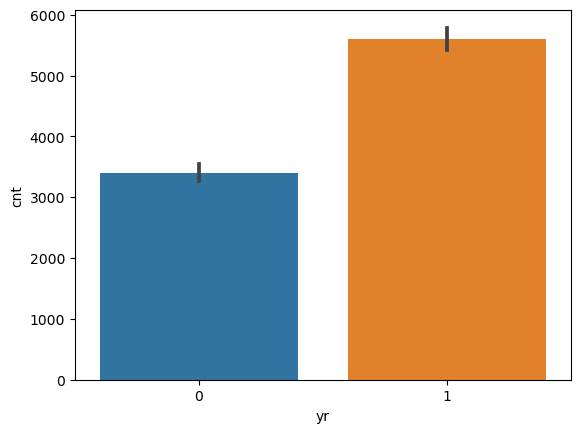

In [11]:
sns.barplot(x='yr',y='cnt',data=bike1)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

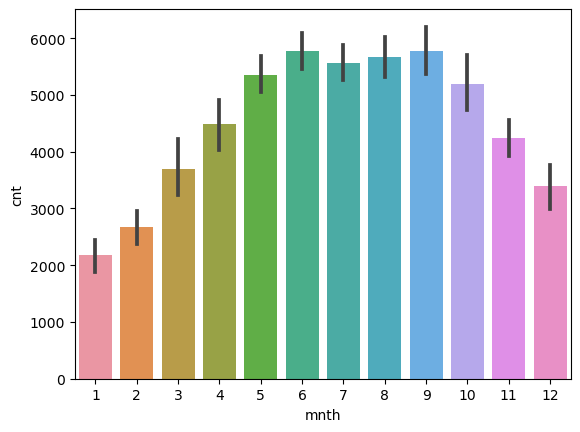

In [12]:
sns.barplot(x='mnth',y='cnt',data=bike1)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

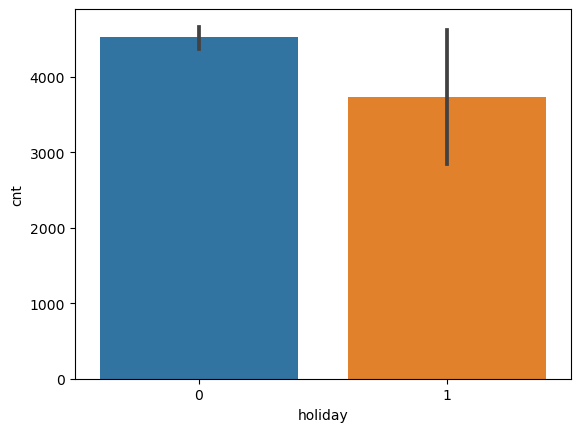

In [13]:
sns.barplot(x='holiday',y='cnt',data=bike1)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

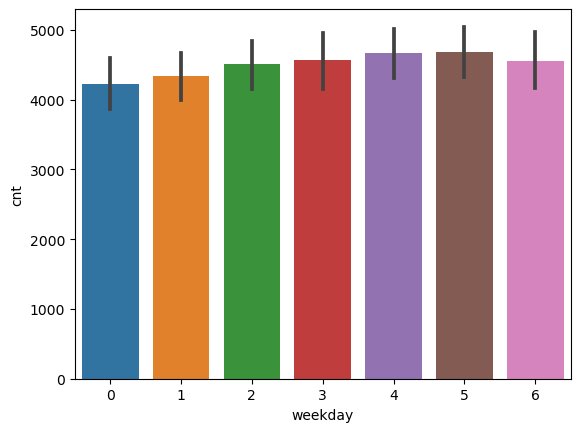

In [14]:
sns.barplot(x='weekday',y='cnt',data=bike1)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

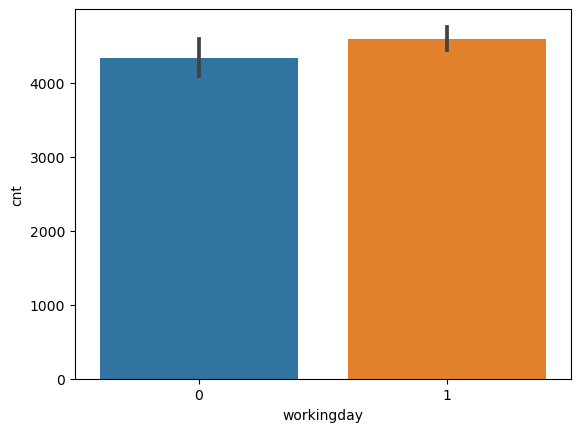

In [15]:
sns.barplot(x='workingday',y='cnt',data=bike1)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

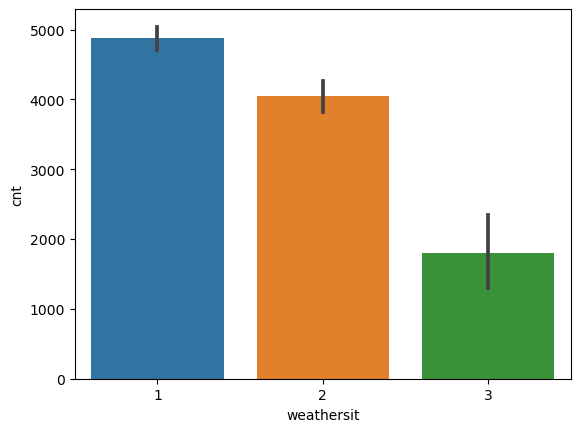

In [16]:
sns.barplot(x='weathersit',y='cnt',data=bike1)

In [17]:
bikes_categorical = bike1.select_dtypes(include=['object'])
bikes_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


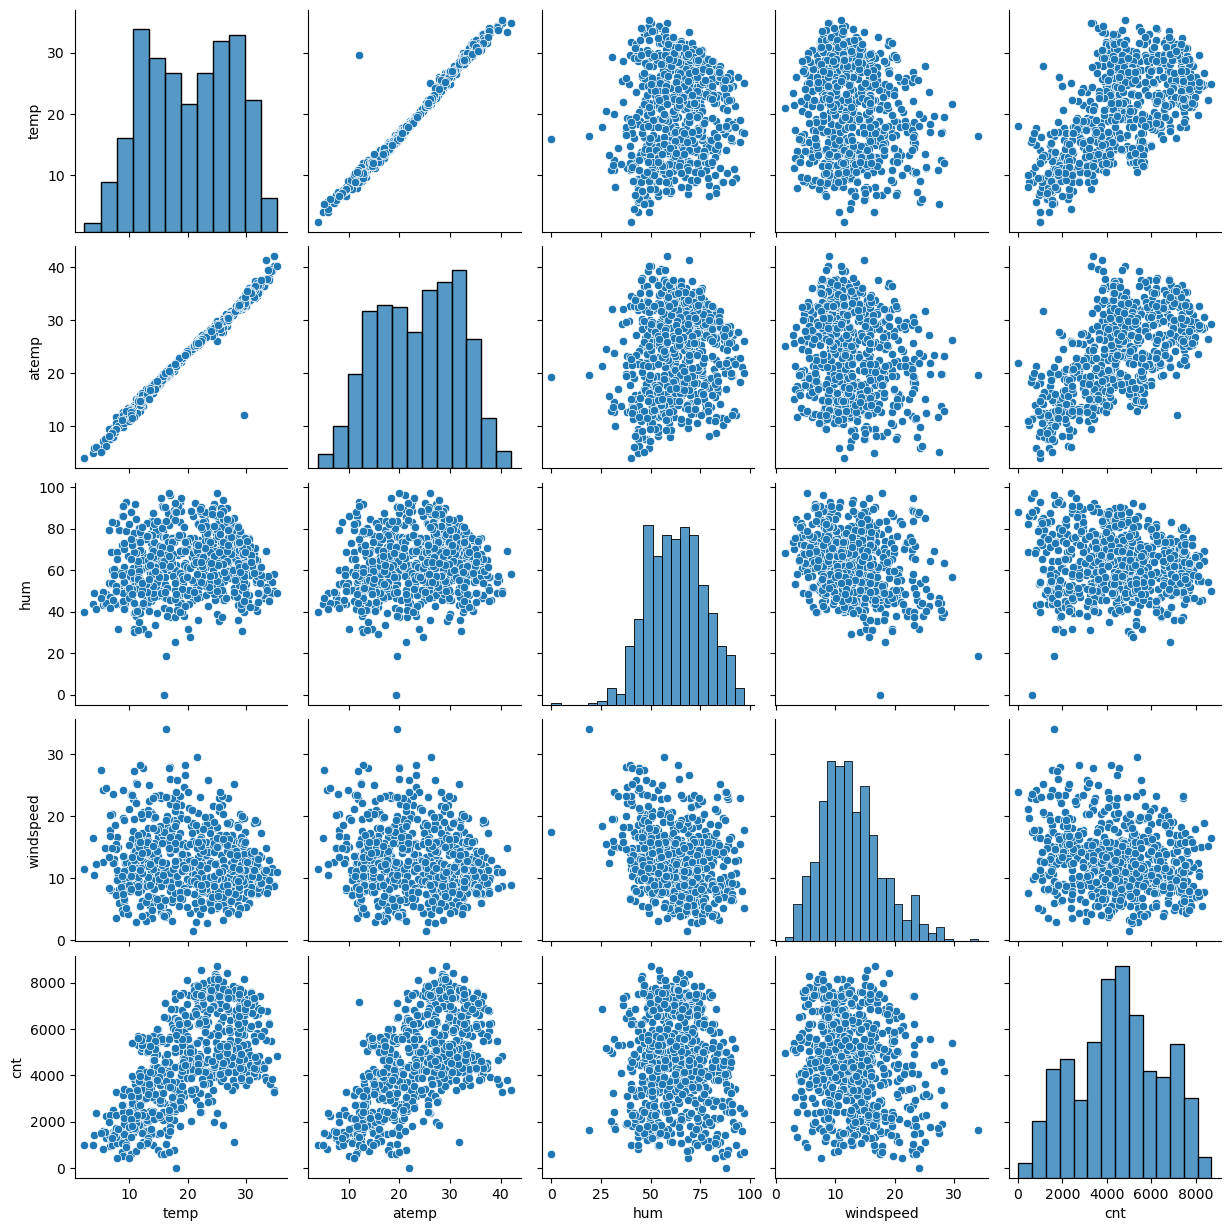

In [18]:
sns.pairplot(bike1.select_dtypes(include=['int','float']))

<AxesSubplot:>

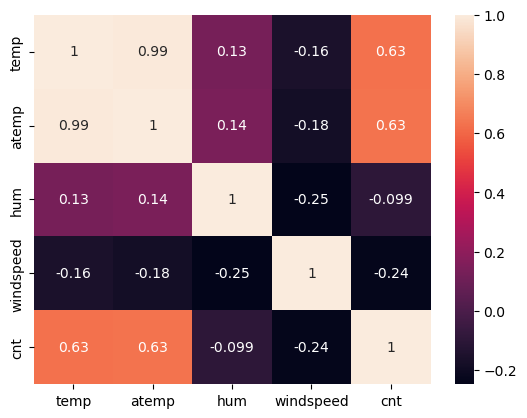

In [19]:
sns.heatmap(bike1.select_dtypes(include=['int','float']).corr(),annot=True)

In [20]:
bike1=bike1.drop('atemp',axis=1)

In [21]:
bikes_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bikes_dummies.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
bike1 = bike1.drop(list(bikes_categorical.columns), axis=1)

In [23]:
bike1 = pd.concat([bike1, bikes_dummies], axis=1)

In [24]:
bike1.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Training the model

In [25]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike1, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
bike1.select_dtypes(include=['int','float']).columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale

varlist=['temp', 'hum', 'windspeed', 'cnt']
# Scale these variables using 'fit_transform'
df_train[varlist]= scaler.fit_transform(df_train[varlist])

In [28]:
df_train

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
653,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1.231731,0.516433,-0.330615,1.399629,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,-0.420478,-0.069854,-0.385694,-0.215554,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,-1.294913,-1.045032,2.018143,-1.379511,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.273152,-0.305544,0.205320,1.116587,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
578,1.448040,0.201190,-0.787759,1.422703,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
53,-1.483204,-1.471329,-1.234384,-1.317467,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
350,-1.281106,-0.497048,0.654645,-0.895981,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
print(lm.coef_)
print(lm.intercept_)

[ 0.45307204 -0.09830147 -0.14096286  0.38722978  0.21463884  0.68638569
  1.03451154  0.13591154  0.28444575  0.27978763  0.38648507  0.26654005
  0.09995226  0.3439844   0.64106174  0.31336391  0.09326142  0.07661682
 -0.19152932 -0.04379813 -0.03480912  0.02536917  0.00821358  0.04938063
  0.24305852  0.19588545 -0.27216551 -1.14739119]
-1.131079993896636


In [32]:
print(list(zip(lm.coef_, lm.feature_names_in_)))

[(0.453072042449512, 'temp'), (-0.09830146576168389, 'hum'), (-0.14096285840655143, 'windspeed'), (0.38722978317973156, 'season_2'), (0.21463884313898796, 'season_3'), (0.6863856858852371, 'season_4'), (1.0345115420769542, 'yr_1'), (0.13591154349118936, 'mnth_2'), (0.2844457528685233, 'mnth_3'), (0.2797876253840514, 'mnth_4'), (0.3864850722082807, 'mnth_5'), (0.2665400541240968, 'mnth_6'), (0.09995226492615146, 'mnth_7'), (0.3439844009994342, 'mnth_8'), (0.6410617382455266, 'mnth_9'), (0.3133639058381057, 'mnth_10'), (0.09326141664388432, 'mnth_11'), (0.0766168244275144, 'mnth_12'), (-0.191529322158017, 'holiday_1'), (-0.04379812787132638, 'weekday_1'), (-0.034809120916386944, 'weekday_2'), (0.02536916530196447, 'weekday_3'), (0.008213584755799266, 'weekday_4'), (0.049380628033629505, 'weekday_5'), (0.24305851515219634, 'weekday_6'), (0.1958854514616962, 'workingday_1'), (-0.27216551495249924, 'weathersit_2'), (-1.1473911905459258, 'weathersit_3')]


In [33]:
y_predict=lm.predict(X_train)

In [34]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

0.8533032523096307

# Trying stats model

In [35]:
# Import statsmodels
import statsmodels.api as sm  

In [36]:
# fitting with all variables

X_train_sm = sm.add_constant(X_train)
col1 = X_train.columns

# Fitting the model with 9 variables
lm1 = sm.OLS(y_train, X_train_sm).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.74e-182
Time:                        19:36:44   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1311      0.102    -11.060   

In [37]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,holiday_1,inf
26,workingday_1,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
0,const,34.36
5,season_3,11.35
14,mnth_8,9.88


In [39]:
# Refitting with variables that have low vif and p values
X_train1=X_train.drop(['weekday_4','weekday_3','mnth_7','mnth_11','mnth_12','weekday_5','weekday_2','weekday_1','mnth_2','season_3','mnth_6','mnth_4','mnth_5'],axis=1)
X_train_sm = sm.add_constant(X_train1)
col1 = X_train1.columns

# Fitting the model with 9 variables
lm1 = sm.OLS(y_train, X_train_sm).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.47e-191
Time:                        19:36:55   Log-Likelihood:                -241.82
No. Observations:                 510   AIC:                             515.6
Df Residuals:                     494   BIC:                             583.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9200      0.057    -16.183   

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.56
2,hum,1.88
13,workingday_1,1.88
5,season_4,1.79
12,weekday_6,1.79
1,temp,1.63
14,weathersit_2,1.57
10,mnth_10,1.49
8,mnth_8,1.47
4,season_2,1.38


In [41]:
col1

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_3',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [42]:
# Import RFE
from sklearn.feature_selection import RFE
# RFE with 15 features
lm2 = LinearRegression()

# Init the transformer
rfe1 = RFE(estimator=lm2, n_features_to_select=10)

# Fit to the training data
rfe1.fit(X_train, y_train)
# Fit with 15 features


# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  


[ True False False  True  True  True  True False False False False False
 False False  True False False False  True False False False False False
  True False  True  True]
[ 1 11 10  1  1  1  1  9  6  8  5  7 12  3  1  4 13 14  1 15 16 18 19 17
  1  2  1  1]


In [43]:
col2 = X_train.columns[rfe1.support_]
col2

Index(['temp', 'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_9',
       'holiday_1', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [44]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col2 = X_train.columns[rfe1.support_]
# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col2]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,temp,season_2,season_3,season_4,yr_1,mnth_9,holiday_1,weekday_6,weathersit_2,weathersit_3
653,1.0,-0.121335,0,0,1,1,0,0,0,0,0
576,1.0,1.231731,0,1,0,1,0,0,0,0,0
426,1.0,-0.420478,0,0,0,1,0,0,1,1,0
728,1.0,-1.294913,0,0,0,1,0,0,0,0,0
482,1.0,-0.627580,1,0,0,1,0,0,1,1,0


In [45]:
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.34e-180
Time:                        19:37:22   Log-Likelihood:                -283.00
No. Observations:                 510   AIC:                             588.0
Df Residuals:                     499   BIC:                             634.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7844      0.059    -13.214   

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.90
3,season_3,4.98
1,temp,3.30
2,season_2,2.53
4,season_4,1.83
6,mnth_9,1.17
9,weathersit_2,1.04
10,weathersit_3,1.04
5,yr_1,1.02
7,holiday_1,1.02


### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [48]:
y_train_price = lm1.predict(X_train_sm)

Text(0.5, 0, 'Errors')

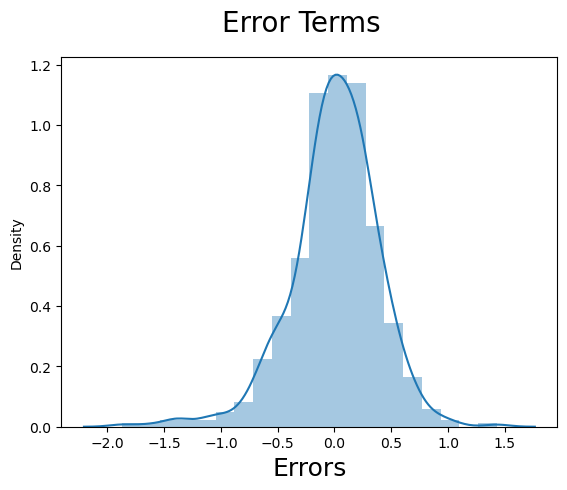

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [50]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [51]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [52]:
col1

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_3',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col1]

In [54]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   temp          219 non-null    float64
 2   hum           219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   yr_1          219 non-null    uint8  
 7   mnth_3        219 non-null    uint8  
 8   mnth_8        219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  mnth_10       219 non-null    uint8  
 11  holiday_1     219 non-null    uint8  
 12  weekday_6     219 non-null    uint8  
 13  workingday_1  219 non-null    uint8  
 14  weathersit_2  219 non-null    uint8  
 15  weathersit_3  219 non-null    uint8  
dtypes: float64(4), uint8(12)
memory usage: 11.1 KB


In [60]:
# Making predictions
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

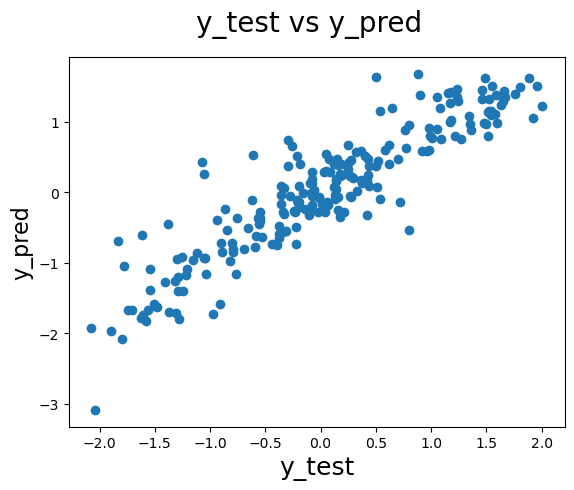

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [62]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8275257527788901

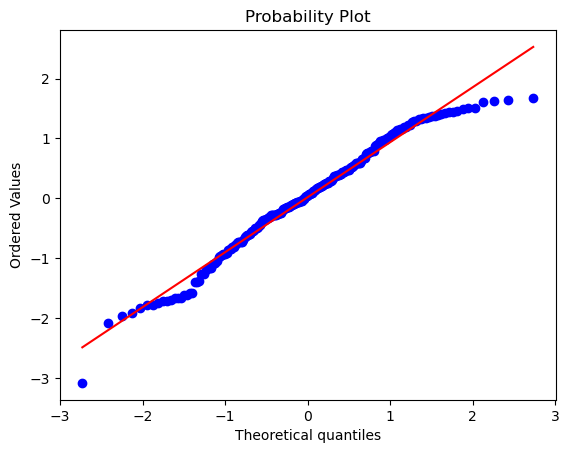

In [63]:
from scipy import stats
res = stats.probplot(y_pred, plot=plt)
plt.show()